# Wine Quality Project

The idea of this project is to remembe concepts of machine learning. The goal is to follow 2 steps: 

1) EDA of the dataset

2) ML Classification

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import xgboost as xgb

sns.set_theme(style="darkgrid")

In [7]:
#Reading dataset

df = pd.read_csv("./dataset/WineQT.csv")

In [8]:
#Dataframe info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [9]:
df.shape

(1143, 13)

In [11]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

Cool, all columns are filled. All of them are numeric. Since this is a prepared dataset, it makes out lives easier (: 

In [ ]:
df.head()
#The only thing we have to do in here is to drop id column


fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  Id
0            7.4              0.70         0.00  ...      9.4        5   0
1            7.8              0.88         0.00  ...      9.8        5   1
2            7.8              0.76         0.04  ...      9.8        5   2
3           11.2              0.28         0.56  ...      9.8        6   3
4            7.4              0.70         0.00  ...      9.4        5   4

[5 rows x 13 columns]

In [12]:
df = df.drop(columns=['Id'])

df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [13]:
df.describe()

fixed acidity  volatile acidity  ...      alcohol      quality
count    1143.000000       1143.000000  ...  1143.000000  1143.000000
mean        8.311111          0.531339  ...    10.442111     5.657043
std         1.747595          0.179633  ...     1.082196     0.805824
min         4.600000          0.120000  ...     8.400000     3.000000
25%         7.100000          0.392500  ...     9.500000     5.000000
50%         7.900000          0.520000  ...    10.200000     6.000000
75%         9.100000          0.640000  ...    11.100000     6.000000
max        15.900000          1.580000  ...    14.900000     8.000000

[8 rows x 12 columns]

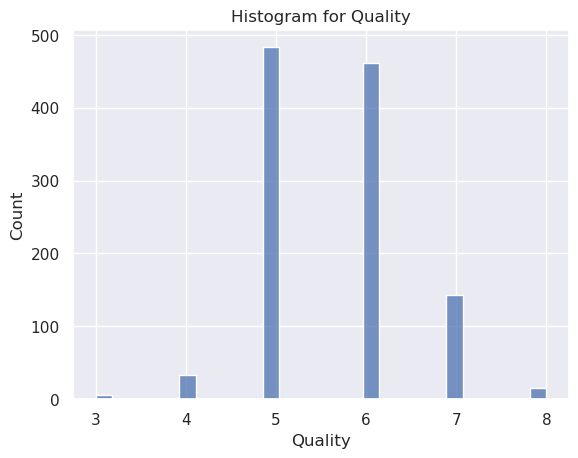

In [ ]:
#Checking the count of quality variable
sns.histplot(data = df, x = 'quality')
plt.title('Histogram for Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

Let's create a 3 classification label for our wines. 

- Bad Wines have Quality of 3 and 4. 

- Intermediate Wines have Quality of 5 and 6.

- Good Wines have Quality of 7 and 8.


Important to note that this leads us to a class unbalance. We shall solve it in the future. 

In [40]:
classes = []
for idx, row in df.iterrows():
    if row['quality'] < 5:
        classes.append('bad')
    elif 5 <= row['quality'] < 7:
        classes.append('intermediate')
    else:
        classes.append('good')

df['class'] = classes

In [41]:
df.head(20)

fixed acidity  volatile acidity  ...  quality         class
0             7.4             0.700  ...        5  intermediate
1             7.8             0.880  ...        5  intermediate
2             7.8             0.760  ...        5  intermediate
3            11.2             0.280  ...        6  intermediate
4             7.4             0.700  ...        5  intermediate
5             7.4             0.660  ...        5  intermediate
6             7.9             0.600  ...        5  intermediate
7             7.3             0.650  ...        7          good
8             7.8             0.580  ...        7          good
9             6.7             0.580  ...        5  intermediate
10            5.6             0.615  ...        5  intermediate
11            7.8             0.610  ...        5  intermediate
12            8.5             0.280  ...        7          good
13            7.9             0.320  ...        6  intermediate
14            7.6             0.390  ...        5  intermediate
15            7.9             0.430  ...        5  intermediate
16            8.5             0.490  ...        5  intermediate
17            6.9             0.400  ...        6  intermediate
18            6.3             0.390  ...        5  intermediate
19            7.6             0.410  ...        5  intermediate

[20 rows x 13 columns]

<Figure size 1500x1000 with 0 Axes>

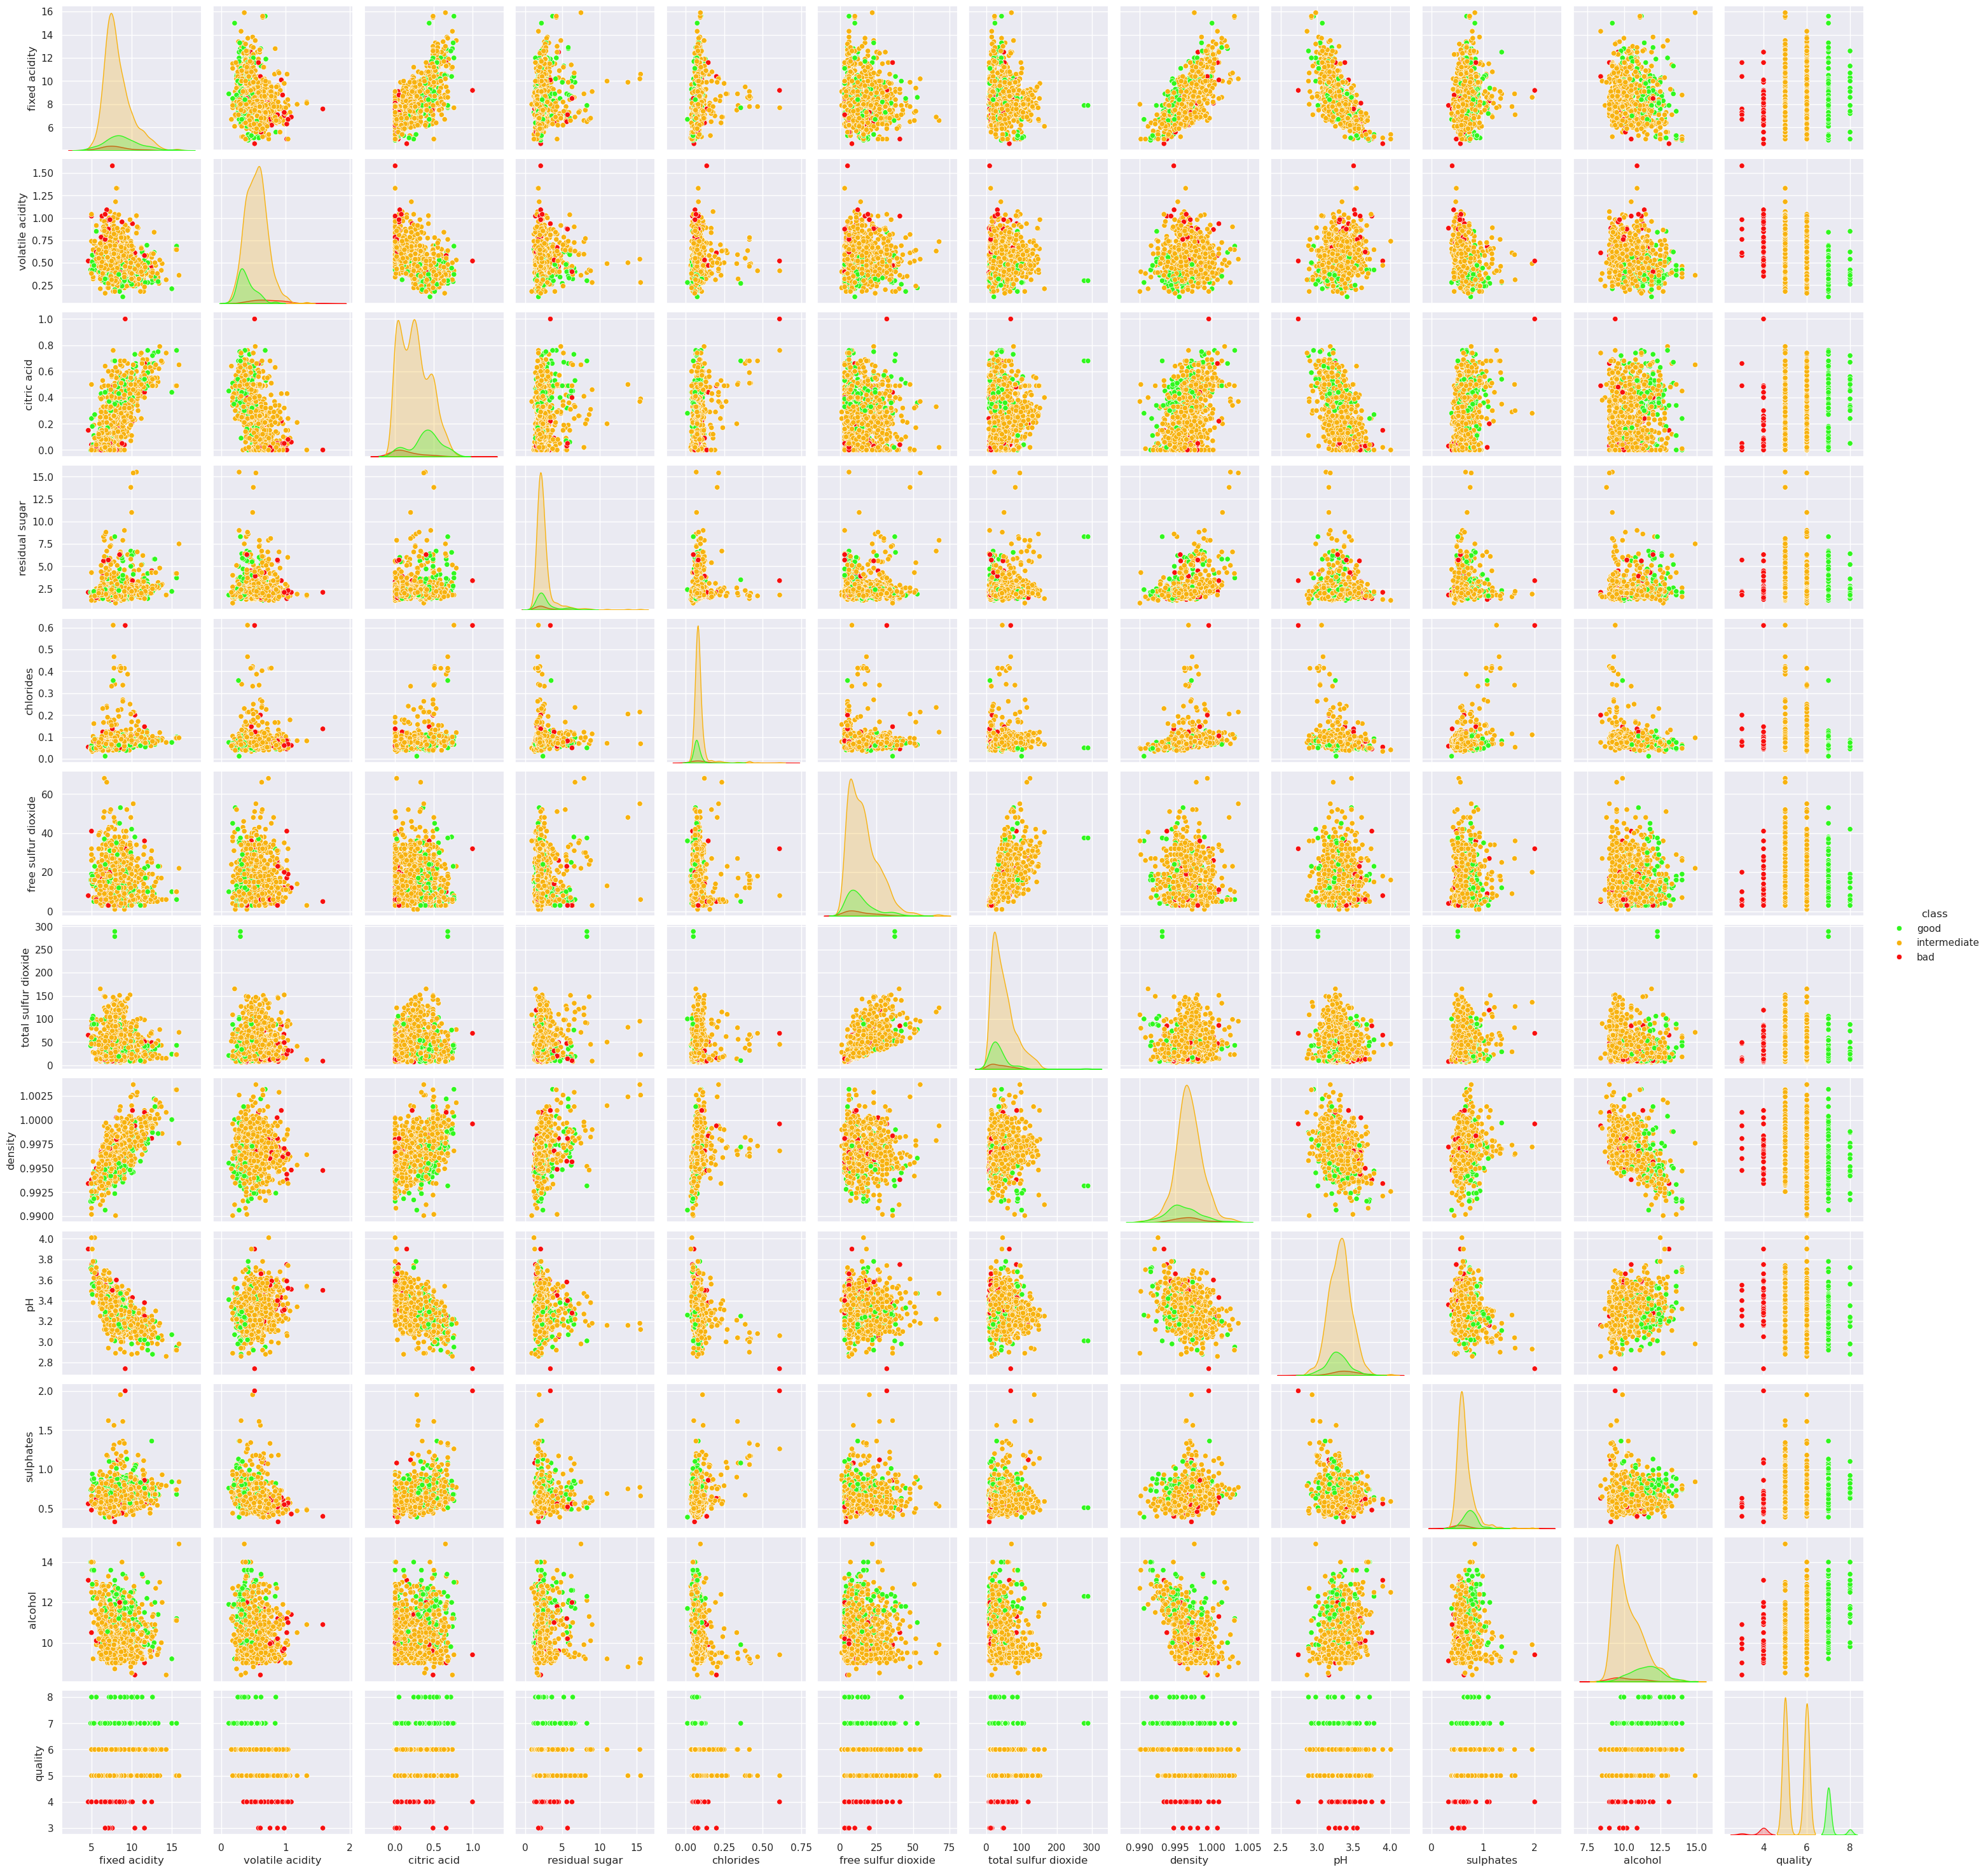

In [44]:
plt.figure(figsize=(15,10))

palette = ['#30f71e', '#f7b20f', "#f70f0f"]

sns.pairplot(df, hue = 'class', hue_order=['good', 'intermediate', 'bad'], palette = palette)
plt.show()

From the plot above, we can get a couple of insights: 

- Better quality wines have more alcohol percentage when compared with the other two classes.

- Good quality wines have a slight lower pH. 

- Bad wines have lower citric acid. 


- Most variable correlations are neither strongly positive or negative. Let's see soon in a correlation heatmap. 

In [50]:
df[df.columns[:-1]].corr()

fixed acidity  volatile acidity  ...   alcohol   quality
fixed acidity              1.000000         -0.250728  ... -0.075055  0.121970
volatile acidity          -0.250728          1.000000  ... -0.203909 -0.407394
citric acid                0.673157         -0.544187  ...  0.106250  0.240821
residual sugar             0.171831         -0.005751  ...  0.058421  0.022002
chlorides                  0.107889          0.056336  ... -0.229917 -0.124085
free sulfur dioxide       -0.164831         -0.001962  ... -0.047095 -0.063260
total sulfur dioxide      -0.110628          0.077748  ... -0.188165 -0.183339
density                    0.681501          0.016512  ... -0.494727 -0.175208
pH                        -0.685163          0.221492  ...  0.225322 -0.052453
sulphates                  0.174592         -0.276079  ...  0.094421  0.257710
alcohol                   -0.075055         -0.203909  ...  1.000000  0.484866
quality                    0.121970         -0.407394  ...  0.484866  1.000000

[12 rows x 12 columns]

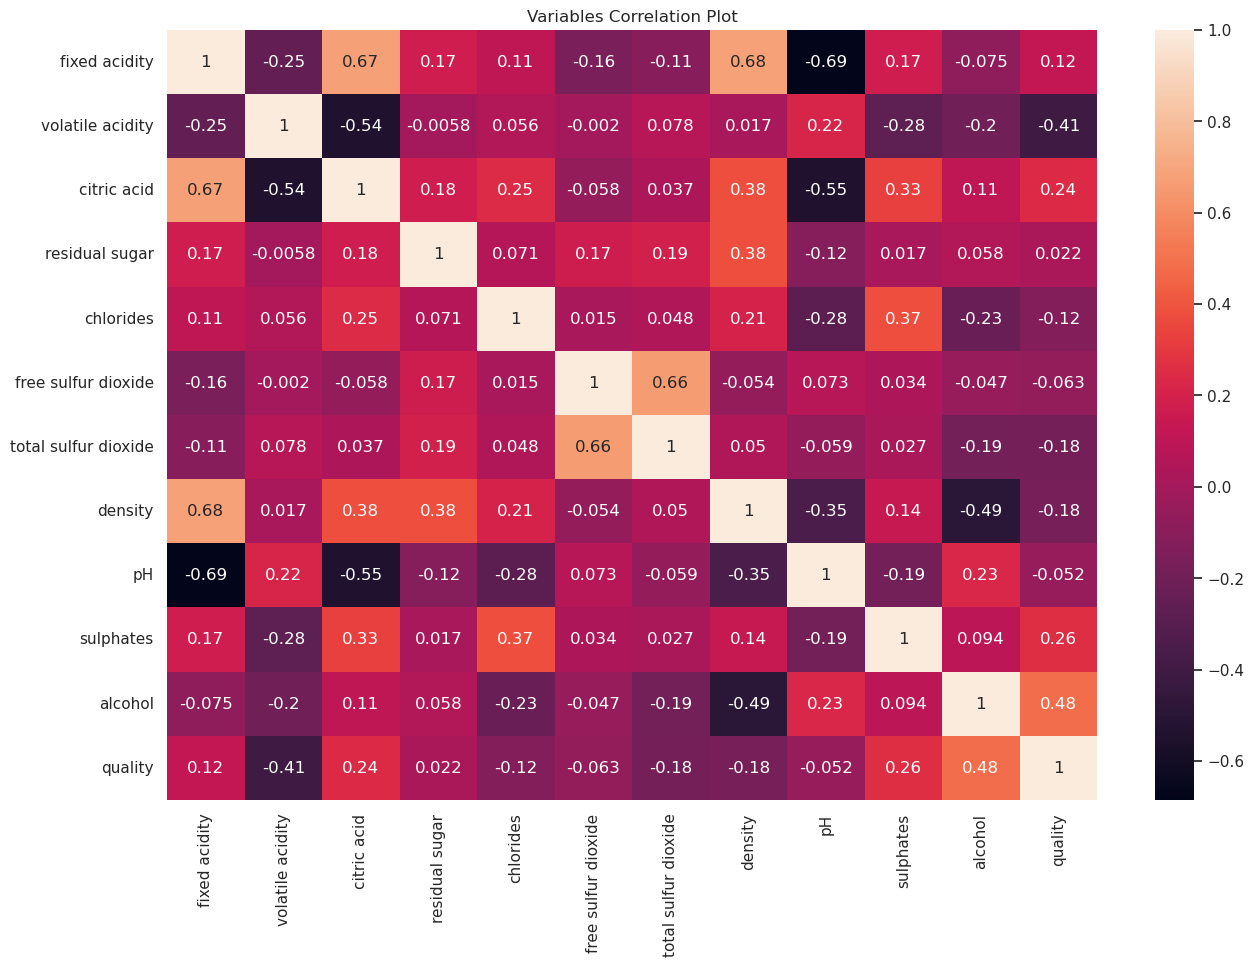

In [53]:
plt.figure(figsize=(15,10))
plt.title('Variables Correlation Plot')
sns.heatmap(df[df.columns[:-1]].corr(), annot=True, fmt='.2g') #we do this little tweak in the df so we'll only have numeric columns
plt.show()

Moderate Correlation: 
- Negative
    - pH x fixed acidity
    - pH x citric acid 
    - citric acid x volatile acidity
- Positive
    - citric acid x fixed acidity
    - density x fixed acidity
    - total sulfur dioxide x free sulfur dioxide

There are no strong or very strong correlations.  

# Data Split

So, our data has unbalanced classes. Let's see their percentages:

In [57]:
df['class'].value_counts() / len(df['class'])

class
intermediate    0.826772
good            0.139108
bad             0.034121
Name: count, dtype: float64

Intermediate has 82.6% of our data. Bad wines are just 3.4%. 

For the first attempts, let's try to use Random Undersampling to deal with the class unbalance.

### a) Regular Train-Test Split

The split will be: 

- 80% train

- 15% test

- 5% validation

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(
    df.drop('class', axis = 1),
    df['class'],
    test_size=0.2
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.5,
)

print(f"Train set: {len(X_train)} rows -  {(len(X_train)/len(df)) * 100}%")
print(f"Validation set: {len(X_val)} rows - {(len(X_val)/len(df)) * 100}%")
print(f"Test set: {len(X_test)} rows - {(len(X_test)/len(df))*100}%")

Train set: 914 rows -  79.9650043744532%
Validation set: 114 rows - 9.973753280839896%
Test set: 115 rows - 10.061242344706912%


In [83]:
log_reg = LogisticRegression(n_jobs = 10, max_iter=100).fit(X_train, y_train)


y_pred_prob = log_reg.predict_proba(X_test)
y_pred = log_reg.predict(X_test)

acc = accuracy_score(y_test, y_pred)

/home/rodrigo.santos/miniconda3/envs/rs_env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [84]:
acc

0.991304347826087

<Axes: >

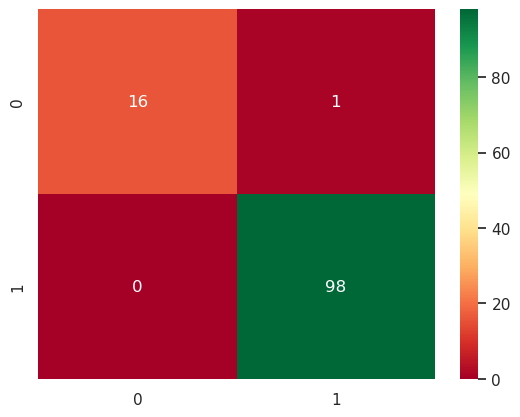

In [88]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='RdYlGn')

Yay, overfitting!

Let's try with regularization and random undersampling.

# Resorces

- [How to deal with unbalanced data](https://medium.com/data-science/class-imbalance-strategies-a-visual-guide-with-code-8bc8fae71e1a)
- [Main Steps for EDA](https://www.geeksforgeeks.org/steps-for-mastering-exploratory-data-analysis-eda-steps/)